# 探索的データ分析
- 行数、列数の確認
- データ型の確認
- 前処理
- 簡易な予測

In [70]:
# ライブラリ読み込み

In [71]:
import pandas as pd
from pycaret.classification import *
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import ColumnDataSource, Grid, LinearAxis, Plot, VBar, HoverTool

In [72]:
output_notebook()

Loading BokehJS ...

In [73]:
# dataframe設定調整

In [157]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [75]:
# データ読み込み

In [76]:
train = pd.read_csv('../../data/rawdata/application_train.csv')

In [77]:
# 概要

In [78]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [79]:
f"行:{len(train)} / 列:{len(train.columns)}"

'行:307511 / 列:122'

In [80]:
train.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [81]:
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [82]:
for c in train.columns:
    print(f'{c}  数:{train[c].isnull().sum()} / 割合:{train[c].isnull().sum() / len(train) * 100}%')

SK_ID_CURR  数:0 / 割合:0.0%
TARGET  数:0 / 割合:0.0%
NAME_CONTRACT_TYPE  数:0 / 割合:0.0%
CODE_GENDER  数:0 / 割合:0.0%
FLAG_OWN_CAR  数:0 / 割合:0.0%
FLAG_OWN_REALTY  数:0 / 割合:0.0%
CNT_CHILDREN  数:0 / 割合:0.0%
AMT_INCOME_TOTAL  数:0 / 割合:0.0%
AMT_CREDIT  数:0 / 割合:0.0%
AMT_ANNUITY  数:12 / 割合:0.003902299429939092%
AMT_GOODS_PRICE  数:278 / 割合:0.09040327012692229%
NAME_TYPE_SUITE  数:1292 / 割合:0.42014757195677555%
NAME_INCOME_TYPE  数:0 / 割合:0.0%
NAME_EDUCATION_TYPE  数:0 / 割合:0.0%
NAME_FAMILY_STATUS  数:0 / 割合:0.0%
NAME_HOUSING_TYPE  数:0 / 割合:0.0%
REGION_POPULATION_RELATIVE  数:0 / 割合:0.0%
DAYS_BIRTH  数:0 / 割合:0.0%
DAYS_EMPLOYED  数:0 / 割合:0.0%
DAYS_REGISTRATION  数:0 / 割合:0.0%
DAYS_ID_PUBLISH  数:0 / 割合:0.0%
OWN_CAR_AGE  数:202929 / 割合:65.9908100848425%
FLAG_MOBIL  数:0 / 割合:0.0%
FLAG_EMP_PHONE  数:0 / 割合:0.0%
FLAG_WORK_PHONE  数:0 / 割合:0.0%
FLAG_CONT_MOBILE  数:0 / 割合:0.0%
FLAG_PHONE  数:0 / 割合:0.0%
FLAG_EMAIL  数:0 / 割合:0.0%
OCCUPATION_TYPE  数:96391 / 割合:31.345545362604916%
CNT_FAM_MEMBERS  数:2 / 割合:0.0006503832383

### 可視化

In [83]:
# バーチャート
def plot_bar_chart(series, title, width=1000):
    
    items = dict(series.value_counts())
    keys = list(items.keys())
    values = list(items.values())
    
    source = ColumnDataSource(data=dict(
    x=keys,
    y=values,
    ))
    
    TOOLTIPS = [
    ("列名", "@x"),
    ("カウント", "@y"),
    ]
      
    p = figure(plot_width=width, plot_height=400, x_range=keys, title=title,
               toolbar_location=None, tooltips=TOOLTIPS, tools="")

    glyph = VBar(x="x", top="y", width=0.9)
    
    p.add_glyph(source, glyph)

    p.xgrid.grid_line_color = None
    p.y_range.start = 0

    show(p)

In [84]:
# ヒストグラム
def plot_histogram(series, title):
    p = figure(title=title, tools="", background_fill_color="#fafafa")
    thres =  np.percentile(series, q=95)
    under_thres =  np.percentile(series, q=5)

    hist, edges = np.histogram(series.where((under_thres <= series) | (series <= thres)), density=True, bins=30)
    p.quad(
        top=hist,
        bottom=0,
        left=edges[:-1],
        right=edges[1:],
        fill_color="navy",
        alpha=0.2,
    )
    p.y_range.start = 0
    show(p)

In [85]:
# ラインチャート
def plot_line_chart(dataframe, col_name, date_name, title) -> int:
    grouped = dataframe.groupby(pd.Grouper(key=date_name, freq='D')).agg(['count'])
    source = ColumnDataSource(grouped)

    hover_tool = HoverTool(
        tooltips=[
            ("件数", f"@{col_name}"),
            ("日時", "@date_name{%F}"), # 'date'フィールドを'%Y-%m-%d %H:%M'でフォーマット
        ],
        formatters={
            f'{date_name}': 'datetime', # 'data'フィールドを'datetime'フォーマットにする
        },
        mode='mouse'
    )

    p = figure(plot_width=1000, x_axis_type='datetime', toolbar_location=None, tools=[hover_tool])

    p.line(x=col_name, y=date_name, source=source, legend_label=title)

    p.yaxis.axis_label = '件数'

    show(p)

In [100]:
for c in train.columns:
    series = train[c].copy()
    if series.dtype == 'int64' or series.dtype == 'float64':
        series.fillna(-999, inplace=True)
        plot_histogram(series, c)
    else:
        series.fillna('-999', inplace=True)
        plot_bar_chart(series, c)
    print(series.value_counts())

100303    1
131861    1
158488    1
156441    1
160539    1
         ..
255446    1
257495    1
234968    1
237017    1
100401    1
Name: SK_ID_CURR, Length: 307511, dtype: int64


0    282686
1     24825
Name: TARGET, dtype: int64


Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64


135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
101119.5        1
79425.0         1
101128.5        1
202275.0        1
262174.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64


450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
827100.0        1
413442.0        1
1652458.5       1
825853.5        1
2097058.5       1
Name: AMT_CREDIT, Length: 5603, dtype: int64


9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
39559.5       1
6016.5        1
79083.0       1
49167.0       1
78691.5       1
Name: AMT_ANNUITY, Length: 13673, dtype: int64


450000.0    26022
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
            ...  
378189.0        1
947884.5        1
377167.5        1
751662.0        1
385222.5        1
Name: AMT_GOODS_PRICE, Length: 1003, dtype: int64


Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
-999                 1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64


0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
0.010966     3110
0.011657     3080
0.010147     3079
0.010643     3012
0.007330     2980
0.007120     2861
0.006629     2818
0.009175     2770
0.010500     2680
0.010276     2601
0.009657     2467
0.006852     2435
0.008625     2290
0.009630     2252
0.010556     2177
0.009334     2083
0.007305     2017
0.006207     1936
0.009549     1834
0.008019     1819
0.008230     1804
0.006008     1796
0.003069     1783
0.008575     1763
0.008474     1740
0.007274  

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-25032     1
-7956      1
-8001      1
-7861      1
-24894     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64


 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-11115         1
-11371         1
-11883         1
-13536         1
-8795          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64


-1.0        113
-7.0         98
-6.0         96
-2.0         92
-4.0         92
           ... 
-12446.0      1
-17298.0      1
-14676.0      1
-15817.0      1
-13267.0      1
Name: DAYS_REGISTRATION, Length: 15688, dtype: int64


-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
        ... 
-5696      1
-6073      1
-6076      1
-6176      1
-6189      1
Name: DAYS_ID_PUBLISH, Length: 6168, dtype: int64


-999.0    202929
 7.0        7424
 6.0        6382
 3.0        6370
 8.0        5887
 2.0        5852
 4.0        5557
 1.0        5280
 9.0        5020
 10.0       4806
 14.0       4594
 13.0       4566
 12.0       4257
 11.0       4161
 5.0        3595
 15.0       3580
 16.0       3355
 17.0       2899
 64.0       2443
 18.0       2418
 0.0        2134
 19.0       1864
 20.0       1527
 21.0       1462
 22.0       1250
 24.0       1150
 23.0       1067
 65.0        891
 25.0        865
 26.0        580
 28.0        542
 27.0        483
 29.0        397
 30.0        326
 31.0        267
 32.0        208
 34.0        183
 35.0        157
 33.0        132
 36.0        124
 38.0         97
 40.0         85
 39.0         78
 37.0         75
 41.0         58
 42.0         42
 44.0         21
 43.0         19
 54.0         12
 45.0         11
 49.0          6
 46.0          5
 55.0          4
 51.0          3
 91.0          2
 63.0          2
 48.0          1
 69.0          1
 57.0         

1    307510
0         1
Name: FLAG_MOBIL, dtype: int64


1    252125
0     55386
Name: FLAG_EMP_PHONE, dtype: int64


0    246203
1     61308
Name: FLAG_WORK_PHONE, dtype: int64


1    306937
0       574
Name: FLAG_CONT_MOBILE, dtype: int64


0    221080
1     86431
Name: FLAG_PHONE, dtype: int64


0    290069
1     17442
Name: FLAG_EMAIL, dtype: int64


-999                     96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


 2.0      158357
 1.0       67847
 3.0       52601
 4.0       24697
 5.0        3478
 6.0         408
 7.0          81
 8.0          20
 9.0           6
 10.0          3
 14.0          2
-999.0         2
 20.0          2
 12.0          2
 16.0          2
 11.0          1
 15.0          1
 13.0          1
Name: CNT_FAM_MEMBERS, dtype: int64


2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64


2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64


TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64


10    37722
11    37229
12    34233
13    30959
14    27682
9     27384
15    24839
16    20385
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64


0    302854
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64


0    291899
1     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64


0    295008
1     12503
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64


0    283472
1     24039
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64


0    236644
1     70867
Name: REG_CITY_NOT_WORK_CITY, dtype: int64


0    252296
1     55215
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64


Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

-999.000000    173378
 0.546426           5
 0.499002           5
 0.443982           5
 0.622707           5
                ...  
 0.241861           1
 0.381263           1
 0.259241           1
 0.116346           1
 0.844540           1
Name: EXT_SOURCE_1, Length: 114585, dtype: int64


 0.285898      721
-999.000000    660
 0.262258      417
 0.265256      343
 0.159679      322
              ... 
 0.383020        1
 0.786006        1
 0.256132        1
 0.297243        1
 0.336367        1
Name: EXT_SOURCE_2, Length: 119832, dtype: int64


-999.000000    60965
 0.746300       1460
 0.713631       1315
 0.694093       1276
 0.670652       1191
               ...  
 0.020311          1
 0.879506          1
 0.020455          1
 0.849170          1
 0.014556          1
Name: EXT_SOURCE_3, Length: 815, dtype: int64


-999.0000    156061
 0.0825        6663
 0.0619        6332
 0.0928        4404
 0.0722        3986
              ...  
 0.1987           1
 0.2519           1
 0.9804           1
 0.1677           1
 0.7608           1
Name: APARTMENTS_AVG, Length: 2340, dtype: int64


-999.0000    179943
 0.0000       14745
 0.0818         251
 0.0545         251
 0.0727         248
              ...  
 0.5326           1
 0.3206           1
 0.4498           1
 0.2443           1
 0.3254           1
Name: BASEMENTAREA_AVG, Length: 3781, dtype: int64


-999.0000    150007
 0.9871        4311
 0.9856        4189
 0.9861        4171
 0.9801        4123
              ...  
 0.7303           1
 0.9220           1
 0.2380           1
 0.4893           1
 0.6508           1
Name: YEARS_BEGINEXPLUATATION_AVG, Length: 286, dtype: int64


-999.0000    204488
 0.8232        2999
 0.8164        2864
 0.8028        2848
 0.7280        2802
 0.7348        2761
 0.8096        2755
 0.8300        2738
 0.7960        2734
 0.7484        2731
 0.7688        2712
 0.7416        2681
 0.7892        2629
 0.7552        2618
 0.7144        2604
 0.7756        2598
 0.7824        2584
 0.7212        2577
 0.7620        2458
 0.7076        2458
 0.7008        2439
 0.8368        2294
 0.6940        2268
 0.6872        2232
 0.6804        2098
 0.6736        1953
 0.8436        1919
 0.6464        1890
 0.6668        1830
 0.6600        1748
 0.6532        1743
 0.6396        1723
 0.8504        1655
 0.8572        1629
 0.6328        1585
 0.6260        1375
 0.8640        1303
 0.6192        1115
 0.8708        1012
 0.6124         879
 0.9592         822
 0.9728         813
 0.9796         786
 0.8776         762
 0.9660         748
 0.9524         705
 0.9864         661
 0.6056         624
 0.9456         607
 0.8844         603


-999.0000    214865
 0.0000        8442
 0.0079         544
 0.0078         475
 0.0080         446
              ...  
 0.1480           1
 0.5108           1
 0.3104           1
 0.4891           1
 0.3607           1
Name: COMMONAREA_AVG, Length: 3182, dtype: int64


-999.0000    163891
 0.0000       85718
 0.0800        9886
 0.1600        8806
 0.2400        6071
              ...  
 0.1736           1
 0.1152           1
 0.0216           1
 0.1140           1
 0.2368           1
Name: ELEVATORS_AVG, Length: 258, dtype: int64


-999.0000    154828
 0.1379       34007
 0.0690       22956
 0.1034       19533
 0.2069       19062
              ...  
 0.2145           1
 0.0659           1
 0.1021           1
 0.0579           1
 0.0493           1
Name: ENTRANCES_AVG, Length: 286, dtype: int64


-999.0000    153020
 0.1667       61875
 0.3333       31909
 0.0417       14600
 0.3750        7926
              ...  
 0.4758           1
 0.1433           1
 0.6129           1
 0.0613           1
 0.1608           1
Name: FLOORSMAX_AVG, Length: 404, dtype: int64


-999.0000    208642
 0.2083       32875
 0.3750       17845
 0.0417       17776
 0.0833        5086
              ...  
 0.1488           1
 0.3000           1
 0.2388           1
 0.3367           1
 0.1425           1
Name: FLOORSMIN_AVG, Length: 306, dtype: int64


-999.0000    182590
 0.0000       15600
 0.0631         189
 0.0316         187
 0.0473         186
              ...  
 0.7410           1
 0.2302           1
 0.4556           1
 0.2629           1
 0.2230           1
Name: LANDAREA_AVG, Length: 3528, dtype: int64


-999.0000    210199
 0.0504        4272
 0.0672        4231
 0.0756        2778
 0.0588        2586
              ...  
 0.1108           1
 0.0830           1
 0.1020           1
 0.0778           1
 0.0788           1
Name: LIVINGAPARTMENTS_AVG, Length: 1869, dtype: int64


-999.0000    154350
 0.0000         284
 0.0512         243
 0.0702         223
 0.0510         223
              ...  
 0.8497           1
 0.4145           1
 0.3524           1
 0.3694           1
 0.6670           1
Name: LIVINGAREA_AVG, Length: 5200, dtype: int64


-999.0000    213514
 0.0000       54549
 0.0039       13606
 0.0077        6351
 0.0116        3714
              ...  
 0.2452           1
 0.6023           1
 0.3629           1
 0.6795           1
 0.0946           1
Name: NONLIVINGAPARTMENTS_AVG, Length: 387, dtype: int64


-999.0000    169682
 0.0000       58735
 0.0012         546
 0.0044         454
 0.0022         440
              ...  
 0.9764           1
 0.2675           1
 0.3896           1
 0.3234           1
 0.2319           1
Name: NONLIVINGAREA_AVG, Length: 3291, dtype: int64


-999.0000    156061
 0.0840        7522
 0.0630        7451
 0.0945        4757
 0.0735        4388
              ...  
 0.8445           1
 0.8971           1
 0.5945           1
 0.8676           1
 0.7532           1
Name: APARTMENTS_MODE, Length: 761, dtype: int64


-999.0000    179943
 0.0000       16598
 0.0566         269
 0.0849         265
 0.0642         253
              ...  
 0.3863           1
 0.3144           1
 0.3315           1
 0.2876           1
 0.3351           1
Name: BASEMENTAREA_MODE, Length: 3842, dtype: int64


-999.0000    150007
 0.9871        4291
 0.9866        4173
 0.9861        4167
 0.9801        4110
              ...  
 0.8421           1
 0.9057           1
 0.7433           1
 0.9176           1
 0.5318           1
Name: YEARS_BEGINEXPLUATATION_MODE, Length: 222, dtype: int64


-999.0000    204488
 0.8301        2960
 0.8236        2879
 0.7387        2789
 0.8171        2763
 0.8105        2755
 0.7452        2737
 0.8367        2711
 0.8040        2707
 0.7583        2704
 0.7779        2689
 0.7256        2645
 0.7321        2626
 0.7517        2597
 0.7975        2579
 0.7909        2547
 0.7844        2541
 0.7125        2529
 0.7648        2525
 0.7190        2485
 0.7713        2424
 0.7060        2353
 0.6994        2307
 0.8432        2225
 0.6929        2188
 0.6864        2002
 0.6602        1956
 0.6798        1879
 0.8497        1870
 0.6668        1825
 0.6733        1806
 0.6537        1799
 0.6472        1660
 0.8563        1585
 0.8628        1576
 0.6406        1418
 0.8693        1265
 0.6341        1167
 0.8759         970
 0.6276         908
 0.9608         859
 0.9804         791
 0.9739         779
 0.9673         746
 0.9543         716
 0.8824         679
 0.9869         653
 0.6210         644
 0.9477         619
 0.8889         536


-999.0000    214865
 0.0000        9690
 0.0080         546
 0.0079         543
 0.0078         518
              ...  
 0.6628           1
 0.2231           1
 0.3144           1
 0.6855           1
 0.2771           1
Name: COMMONAREA_MODE, Length: 3129, dtype: int64


-999.0000    163891
 0.0000       89498
 0.0806       11629
 0.1611        9675
 0.2417        6379
 0.1208        5734
 0.0403        4876
 0.2014        3962
 0.3222        2887
 0.2820        2135
 0.4028        1554
 0.3625        1308
 0.4834        1094
 0.4431         628
 0.5639         491
 0.6445         447
 0.5236         253
 0.6042         226
 0.7250         219
 1.0000         144
 0.8056         137
 0.6848          99
 0.9667          87
 0.8862          66
 0.7653          38
 0.8459          34
 0.9264          20
Name: ELEVATORS_MODE, dtype: int64


-999.0000    154828
 0.1379       36041
 0.0690       26704
 0.1034       20533
 0.2069       19678
 0.0345       19428
 0.1724        8986
 0.2759        8036
 0.2414        4013
 0.3448        2046
 0.3103        2014
 0.4138        1212
 0.3793         977
 0.4828         500
 0.4483         431
 0.0000         387
 0.5517         351
 0.5172         301
 0.6207         241
 0.5862         186
 1.0000         152
 0.6897         116
 0.6552          65
 0.8966          52
 0.7586          48
 0.7241          44
 0.8276          42
 0.7931          39
 0.9655          25
 0.9310          21
 0.8621          14
Name: ENTRANCES_MODE, dtype: int64


-999.0000    153020
 0.1667       65550
 0.3333       34373
 0.0417       15616
 0.3750        8321
 0.1250        7267
 0.0833        6785
 0.0000        3415
 0.4583        3216
 0.6250        2075
 0.5417        1836
 0.6667        1710
 0.2083        1505
 0.2500         572
 0.2917         511
 0.5833         391
 0.4167         236
 0.8750         229
 0.7083         199
 0.5000         184
 1.0000         164
 0.7500         124
 0.9583          94
 0.7917          58
 0.9167          38
 0.8333          22
Name: FLOORSMAX_MODE, dtype: int64


-999.0000    208642
 0.2083       34403
 0.3750       19042
 0.0417       18917
 0.0833        5349
 0.4167        4105
 0.1667        3636
 0.1250        3170
 0.0000        2517
 0.5000        1889
 0.6667        1264
 0.7083        1143
 0.5833        1051
 0.2500         772
 0.2917         359
 0.3333         320
 0.6250         207
 1.0000         141
 0.5417         140
 0.9167         131
 0.4583         105
 0.7500          99
 0.7917          61
 0.8333          22
 0.9583          17
 0.8750           9
Name: FLOORSMIN_MODE, dtype: int64


-999.0000    182590
 0.0000       17453
 0.0194         208
 0.0645         193
 0.0484         192
              ...  
 0.3699           1
 0.3600           1
 0.2922           1
 0.4341           1
 0.3554           1
Name: LANDAREA_MODE, Length: 3564, dtype: int64


-999.0000    210199
 0.0551        4931
 0.0735        4797
 0.0826        2966
 0.0643        2853
              ...  
 0.6584           1
 0.9826           1
 0.7925           1
 0.6740           1
 0.4472           1
Name: LIVINGAPARTMENTS_MODE, Length: 737, dtype: int64


-999.0000    154350
 0.0000         444
 0.0530         272
 0.0532         262
 0.0529         249
              ...  
 0.4844           1
 0.5606           1
 0.7897           1
 0.5616           1
 0.6665           1
Name: LIVINGAREA_MODE, Length: 5302, dtype: int64


-999.0000    213514
 0.0000       59255
 0.0039       14105
 0.0078        6413
 0.0117        3675
 0.0156        2492
 0.0195        1653
 0.0233        1177
 0.0272         840
 0.0311         711
 0.0350         527
 0.0389         494
 0.0428         289
 0.0467         245
 0.0506         194
 0.0545         176
 0.0584         160
 0.0700         130
 0.0623         127
 1.0000         100
 0.0661          73
 0.0778          70
 0.0934          63
 0.0817          53
 0.0856          45
 0.0739          43
 0.0895          37
 0.1089          37
 0.1012          34
 0.0973          33
 0.1556          31
 0.1206          24
 0.1167          23
 0.1401          21
 0.3113          21
 0.1051          20
 0.1634          18
 0.2335          18
 0.2490          16
 0.3074          15
 0.1128          15
 0.2101          15
 0.1284          15
 0.1323          15
 0.1595          14
 0.1362          13
 0.2802          13
 0.2218          12
 0.1245          12
 0.2062          12


-999.0000    169682
 0.0000       67126
 0.0011         477
 0.0046         466
 0.0033         430
              ...  
 0.3167           1
 0.8592           1
 0.4457           1
 0.7801           1
 0.3147           1
Name: NONLIVINGAREA_MODE, Length: 3328, dtype: int64


-999.0000    156061
 0.0833        7109
 0.0625        6687
 0.0937        4622
 0.0729        4211
              ...  
 0.7724           1
 0.7505           1
 0.3159           1
 0.7838           1
 0.4689           1
Name: APARTMENTS_MEDI, Length: 1149, dtype: int64


-999.0000    179943
 0.0000       14991
 0.0818         271
 0.1091         266
 0.0545         265
              ...  
 0.3250           1
 0.3566           1
 0.2394           1
 0.6449           1
 0.4209           1
Name: BASEMENTAREA_MEDI, Length: 3773, dtype: int64


-999.0000    150007
 0.9871        4314
 0.9861        4247
 0.9856        4199
 0.9866        4138
              ...  
 0.8967           1
 0.9101           1
 0.4873           1
 0.9091           1
 0.8818           1
Name: YEARS_BEGINEXPLUATATION_MEDI, Length: 246, dtype: int64


-999.0000    204488
 0.8256        2994
 0.8189        2883
 0.8054        2842
 0.7316        2799
 0.8121        2784
 0.8323        2740
 0.7383        2739
 0.7987        2700
 0.7518        2687
 0.7719        2686
 0.7451        2642
 0.7182        2599
 0.7249        2592
 0.7920        2591
 0.7786        2585
 0.7853        2585
 0.7585        2578
 0.7652        2484
 0.7048        2474
 0.7115        2466
 0.8390        2287
 0.6981        2278
 0.6914        2254
 0.6847        2109
 0.6780        1965
 0.6511        1906
 0.8457        1895
 0.6713        1852
 0.6578        1758
 0.6645        1754
 0.6444        1732
 0.8591        1634
 0.8524        1631
 0.6377        1608
 0.6310        1374
 0.8658        1324
 0.6243        1119
 0.8725        1003
 0.6176         874
 0.9597         841
 0.9732         819
 0.9799         802
 0.9665         755
 0.8792         735
 0.9530         717
 0.9866         665
 0.9463         637
 0.6109         619
 0.8859         593


-999.0000    214865
 0.0000        8691
 0.0079         581
 0.0080         486
 0.0078         481
              ...  
 0.3045           1
 0.1470           1
 0.1773           1
 0.3571           1
 0.2804           1
Name: COMMONAREA_MEDI, Length: 3203, dtype: int64


-999.00    163891
 0.00       87026
 0.08       10832
 0.16        9278
 0.24        6392
 0.12        5946
 0.04        4852
 0.20        4162
 0.32        2937
 0.28        2317
 0.40        1604
 0.36        1405
 0.48        1096
 0.44         715
 0.10         543
 0.56         493
 0.64         454
 0.06         388
 0.14         388
 0.02         368
 0.52         290
 0.18         280
 0.60         248
 0.22         226
 0.72         224
 1.00         158
 0.26         145
 0.80         140
 0.68         112
 0.30          94
 0.96          81
 0.34          80
 0.88          68
 0.38          62
 0.76          45
 0.84          32
 0.42          32
 0.46          23
 0.92          20
 0.50          16
 0.54          10
 0.78          10
 0.90           6
 0.58           6
 0.74           6
 0.66           5
 0.62           5
Name: ELEVATORS_MEDI, dtype: int64


-999.0000    154828
 0.1379       35535
 0.0690       24193
 0.1034       20492
 0.2069       19750
 0.0345       16150
 0.1724        9566
 0.2759        8048
 0.2414        4318
 0.3448        2108
 0.3103        2086
 0.0862        1352
 0.1207        1228
 0.4138        1198
 0.3793        1010
 0.1552         788
 0.0517         611
 0.1897         554
 0.4828         503
 0.4483         438
 0.5517         352
 0.0000         329
 0.5172         304
 0.2241         278
 0.6207         241
 0.5862         187
 0.2586         169
 1.0000         153
 0.6897         116
 0.2931         106
 0.6552          68
 0.3276          59
 0.8966          52
 0.7586          48
 0.7241          44
 0.8276          42
 0.7931          39
 0.3621          39
 0.4310          31
 0.9655          25
 0.9310          21
 0.8621          14
 0.3966          14
 0.4655          12
 0.0172           7
 0.5690           4
 0.5000           1
Name: ENTRANCES_MEDI, dtype: int64


-999.0000    153020
 0.1667       63607
 0.3333       33279
 0.0417       14832
 0.3750        8207
 0.1250        7079
 0.0833        6657
 0.4583        3089
 0.0000        2995
 0.6250        2042
 0.5417        1860
 0.2500        1684
 0.6667        1675
 0.2083        1544
 0.2917         567
 0.1042         460
 0.3542         459
 0.5833         439
 0.3958         346
 0.4167         329
 0.1458         321
 0.5000         312
 0.2708         291
 0.1875         245
 0.8750         223
 0.4792         220
 0.7083         204
 1.0000         170
 0.4375         138
 0.7500         136
 0.0625         132
 0.3125         131
 0.2292         128
 0.0208         126
 0.6042         115
 0.9583          95
 0.7917          61
 0.5208          47
 0.5625          46
 0.8333          39
 0.9167          37
 0.6458          30
 0.7708          27
 0.6875          24
 0.8125          23
 0.7292          10
 0.9375           4
 0.8542           3
 0.8958           2
 0.9792           1


-999.0000    208642
 0.2083       33737
 0.3750       18538
 0.0417       18090
 0.0833        5131
 0.4167        4068
 0.1667        3570
 0.1250        3373
 0.0000        2351
 0.5000        1835
 0.6667        1261
 0.7083        1108
 0.5833        1057
 0.2917         852
 0.2500         779
 0.3333         341
 0.6250         235
 0.5417         212
 0.3958         205
 0.4375         186
 0.1458         180
 0.1875         159
 0.4583         154
 0.3125         148
 1.0000         147
 0.9167         130
 0.2292         121
 0.7500         116
 0.1042         106
 0.2708         104
 0.5208          81
 0.3542          79
 0.7917          64
 0.4792          61
 0.0625          51
 0.0208          50
 0.6458          49
 0.8333          27
 0.5625          19
 0.6042          16
 0.8750          16
 0.9583          14
 0.8125          12
 0.7292          10
 0.6875           9
 0.7708           7
 0.9792           5
 0.8542           5
Name: FLOORSMIN_MEDI, dtype: int64


-999.0000    182590
 0.0000       15919
 0.0193         197
 0.0642         194
 0.0482         186
              ...  
 0.1807           1
 0.5258           1
 0.6303           1
 0.6814           1
 0.5344           1
Name: LANDAREA_MEDI, Length: 3561, dtype: int64


-999.0000    210199
 0.0513        4500
 0.0684        4497
 0.0770        2926
 0.0599        2708
              ...  
 0.6328           1
 0.1706           1
 0.1791           1
 0.8183           1
 0.6396           1
Name: LIVINGAPARTMENTS_MEDI, Length: 1098, dtype: int64


-999.0000    154350
 0.0000         299
 0.0548         239
 0.0518         234
 0.0520         233
              ...  
 0.4183           1
 0.6305           1
 0.5266           1
 0.3131           1
 0.5239           1
Name: LIVINGAREA_MEDI, Length: 5282, dtype: int64


-999.0000    213514
 0.0000       56097
 0.0039       14126
 0.0078        6493
 0.0116        3788
              ...  
 0.5959           1
 0.3765           1
 0.5046           1
 0.9938           1
 0.7065           1
Name: NONLIVINGAPARTMENTS_MEDI, Length: 215, dtype: int64


-999.0000    169682
 0.0000       60954
 0.0012         539
 0.0022         478
 0.0037         456
              ...  
 0.3305           1
 0.2427           1
 0.1831           1
 0.2288           1
 0.3657           1
Name: NONLIVINGAREA_MEDI, Length: 3324, dtype: int64


-999                     210295
reg oper account          73830
reg oper spec account     12080
not specified              5687
org spec account           5619
Name: FONDKAPREMONT_MODE, dtype: int64


-999                154297
block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64


-999.0000    148431
 0.0000         582
 0.0570         247
 0.0547         230
 0.0548         227
              ...  
 0.6872           1
 0.5167           1
 0.3445           1
 0.2791           1
 0.7334           1
Name: TOTALAREA_MODE, Length: 5117, dtype: int64


-999            156341
Panel            66040
Stone, brick     64815
Block             9253
Wooden            5362
Mixed             2296
Monolithic        1779
Others            1625
Name: WALLSMATERIAL_MODE, dtype: int64


No      159428
-999    145755
Yes       2328
Name: EMERGENCYSTATE_MODE, dtype: int64


 0.0      163910
 1.0       48783
 2.0       29808
 3.0       20322
 4.0       14143
 5.0        9553
 6.0        6453
 7.0        4390
 8.0        2967
 9.0        2003
 10.0       1376
-999.0      1021
 11.0        852
 12.0        652
 13.0        411
 14.0        258
 15.0        166
 16.0        133
 17.0         88
 18.0         46
 19.0         44
 20.0         30
 21.0         29
 22.0         22
 23.0         15
 24.0         11
 25.0         11
 27.0          5
 26.0          3
 30.0          2
 348.0         1
 28.0          1
 47.0          1
 29.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64


 0.0      271324
 1.0       28328
 2.0        5323
 3.0        1192
-999.0      1021
 4.0         253
 5.0          56
 6.0          11
 7.0           1
 8.0           1
 34.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64


 0.0      164666
 1.0       48870
 2.0       29766
 3.0       20215
 4.0       13946
 5.0        9463
 6.0        6349
 7.0        4344
 8.0        2886
 9.0        1959
 10.0       1335
-999.0      1021
 11.0        837
 12.0        620
 13.0        401
 14.0        238
 15.0        166
 16.0        137
 17.0         73
 18.0         49
 19.0         44
 20.0         30
 21.0         28
 22.0         20
 23.0         13
 24.0         12
 25.0         11
 27.0          5
 29.0          2
 344.0         1
 28.0          1
 47.0          1
 26.0          1
 30.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


 0.0      280721
 1.0       21841
 2.0        3170
-999.0      1021
 3.0         598
 4.0         135
 5.0          20
 6.0           3
 24.0          1
 7.0           1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64


 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-3558.0        1
-3978.0        1
-3701.0        1
-3809.0        1
-3731.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64


0    307498
1        13
Name: FLAG_DOCUMENT_2, dtype: int64


1    218340
0     89171
Name: FLAG_DOCUMENT_3, dtype: int64


0    307486
1        25
Name: FLAG_DOCUMENT_4, dtype: int64


0    302863
1      4648
Name: FLAG_DOCUMENT_5, dtype: int64


0    280433
1     27078
Name: FLAG_DOCUMENT_6, dtype: int64


0    307452
1        59
Name: FLAG_DOCUMENT_7, dtype: int64


0    282487
1     25024
Name: FLAG_DOCUMENT_8, dtype: int64


0    306313
1      1198
Name: FLAG_DOCUMENT_9, dtype: int64


0    307504
1         7
Name: FLAG_DOCUMENT_10, dtype: int64


0    306308
1      1203
Name: FLAG_DOCUMENT_11, dtype: int64


0    307509
1         2
Name: FLAG_DOCUMENT_12, dtype: int64


0    306427
1      1084
Name: FLAG_DOCUMENT_13, dtype: int64


0    306608
1       903
Name: FLAG_DOCUMENT_14, dtype: int64


0    307139
1       372
Name: FLAG_DOCUMENT_15, dtype: int64


0    304458
1      3053
Name: FLAG_DOCUMENT_16, dtype: int64


0    307429
1        82
Name: FLAG_DOCUMENT_17, dtype: int64


0    305011
1      2500
Name: FLAG_DOCUMENT_18, dtype: int64


0    307328
1       183
Name: FLAG_DOCUMENT_19, dtype: int64


0    307355
1       156
Name: FLAG_DOCUMENT_20, dtype: int64


0    307408
1       103
Name: FLAG_DOCUMENT_21, dtype: int64


 0.0      264366
-999.0     41519
 1.0        1560
 2.0          56
 3.0           9
 4.0           1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64


 0.0      264503
-999.0     41519
 1.0        1292
 2.0         106
 3.0          45
 4.0          26
 5.0           9
 6.0           8
 9.0           2
 8.0           1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64


 0.0      257456
-999.0     41519
 1.0        8208
 2.0         199
 3.0          58
 4.0          34
 6.0          20
 5.0          10
 8.0           5
 7.0           2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64


 0.0      222233
-999.0     41519
 1.0       33147
 2.0        5386
 3.0        1991
 4.0        1076
 5.0         602
 6.0         343
 7.0         298
 9.0         206
 8.0         185
 10.0        132
 11.0        119
 12.0         77
 13.0         72
 14.0         40
 15.0         35
 16.0         23
 17.0         14
 18.0          6
 19.0          3
 27.0          1
 22.0          1
 24.0          1
 23.0          1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64


 0.0      215417
-999.0     41519
 1.0       33862
 2.0       14412
 3.0        1717
 4.0         476
 5.0          64
 6.0          28
 7.0           7
 8.0           7
 19.0          1
 261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64


 0.0      71801
 1.0      63405
 2.0      50192
-999.0    41519
 3.0      33628
 4.0      20714
 5.0      12052
 6.0       6967
 7.0       3869
 8.0       2127
 9.0       1096
 11.0        31
 12.0        30
 10.0        22
 13.0        19
 14.0        10
 17.0         7
 15.0         6
 18.0         4
 19.0         4
 16.0         3
 23.0         1
 25.0         1
 22.0         1
 20.0         1
 21.0         1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64


In [13]:
# pycaret予測

In [149]:
exp = setup(data=train,
            target='TARGET',
            session_id=123,
#             normalize = True, 
#             transformation = True, 
#             ignore_low_variance = True,
#             remove_multicollinearity = True,
#             multicollinearity_threshold = 0.95,
            ignore_features = ['SK_ID_CURR'],
            log_experiment = True,
            experiment_name = 'credit1', 
            n_jobs=-1,
            silent=True)

,Description,Value
0,session_id,123
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(307511, 122)"
5,Missing Values,True
6,Numeric Features,62
7,Categorical Features,58
8,Ordinal Features,False
9,High Cardinality Features,False


In [151]:
models = compare_models(include=['lr', 'dt', 'rf', 'svm','lightgbm'],
                        sort='AUC')
#                         n_select=3

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9199,0.7542,0.0168,0.5313,0.0326,0.0278,0.0835,2.1510
rf,Random Forest Classifier,0.9197,0.7063,0.0007,0.6000,0.0014,0.0012,0.0183,19.6340
lr,Logistic Regression,0.9197,0.6238,0.0000,0.0000,0.0000,-0.0000,-0.0004,4.6010
dt,Decision Tree Classifier,0.8526,0.5364,0.1597,0.1383,0.1482,0.0680,0.0682,5.4910
svm,SVM - Linear Kernel,0.8692,0.0000,0.0913,0.0849,0.0368,0.0122,0.0169,6.1600


In [106]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9201,0.7221,0.0081,0.7000,0.0160,0.0142,0.0695
1,0.9197,0.7228,0.0081,0.5185,0.0159,0.0135,0.0571
2,0.9199,0.7271,0.0064,0.6111,0.0126,0.0110,0.0565
3,0.9199,0.7221,0.0058,0.6250,0.0115,0.0100,0.0547
4,0.9199,0.7180,0.0035,0.7500,0.0069,0.0062,0.0475
5,0.9195,0.7242,0.0023,0.3636,0.0046,0.0036,0.0236
6,0.9192,0.7357,0.0017,0.1875,0.0034,0.0020,0.0108
7,0.9197,0.7290,0.0052,0.4737,0.0103,0.0086,0.0430
8,0.9197,0.7214,0.0035,0.5000,0.0069,0.0058,0.0365
9,0.9200,0.7245,0.0075,0.6842,0.0149,0.0132,0.0660


In [107]:
evaluate_model(lgbm)

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


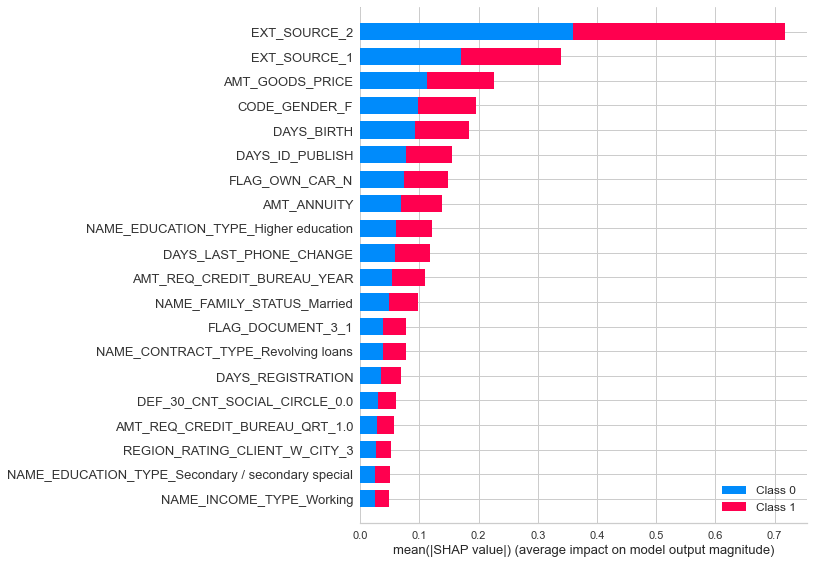

In [108]:
interpret_model(lgbm)

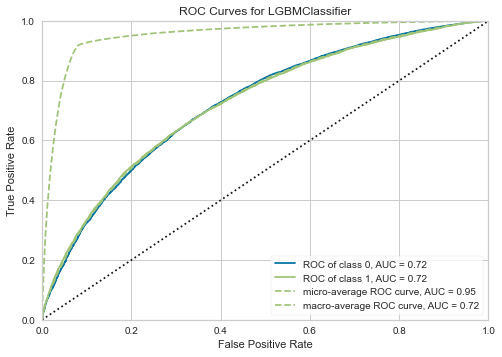

In [109]:
plot_model(lgbm)

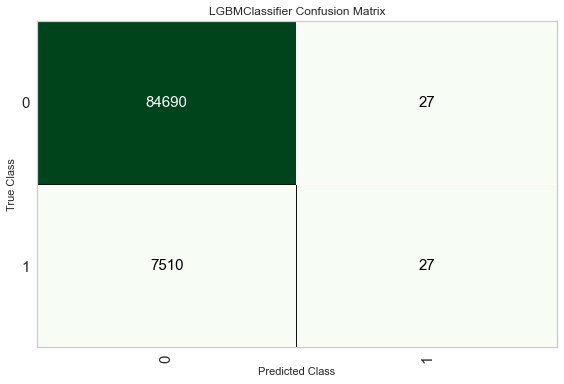

In [110]:
plot_model(lgbm, plot='confusion_matrix')

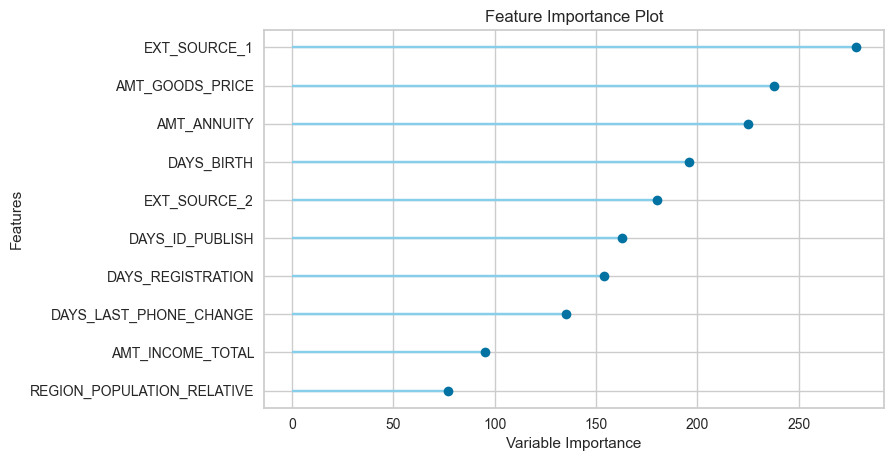

In [111]:
plot_model(lgbm, plot='feature')

In [158]:
importance = pd.DataFrame(models.feature_importances_, index=exp[0].columns, columns=['importance'])
importance.sort_values('importance', ascending=False)

,importance
EXT_SOURCE_1,229
EXT_SOURCE_3,209
EXT_SOURCE_2,182
DAYS_BIRTH,166
AMT_CREDIT,163
AMT_ANNUITY,139
DAYS_ID_PUBLISH,123
AMT_GOODS_PRICE,112
DAYS_REGISTRATION,112
DAYS_LAST_PHONE_CHANGE,103


In [168]:
features = list(importance.sort_values('importance', ascending=False).index[:20])

In [169]:
set(features) - set(train.columns)

{'CODE_GENDER_F',
 'NAME_CONTRACT_TYPE_Cash loans',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_FAMILY_STATUS_Married'}

In [170]:
features.remove('CODE_GENDER_F')
features.remove('NAME_CONTRACT_TYPE_Cash loans')
features.remove('NAME_EDUCATION_TYPE_Higher education')
features.remove('NAME_FAMILY_STATUS_Married')

In [171]:
features.extend(['CODE_GENDER',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS'])

In [172]:
features

['EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'DAYS_ID_PUBLISH',
 'AMT_GOODS_PRICE',
 'DAYS_REGISTRATION',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'OWN_CAR_AGE',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'HOUR_APPR_PROCESS_START',
 'TOTALAREA_MODE',
 'CODE_GENDER',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS']